<a href="https://colab.research.google.com/github/bruno774/mestrado/blob/master/AlemDaPena_p3_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## preliminaries

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
data_src = pd.read_pickle('alemPena-p2.pickle')

In [ ]:
# just checking
data_src.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 180 to 881
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GeneroReu           606 non-null    int64  
 1   Reclusao            606 non-null    int64  
 2   Detencao            606 non-null    int64  
 3   Multa               606 non-null    int64  
 4   CulpabCirc          606 non-null    int64  
 5   AntecedCirc         606 non-null    int64  
 6   CondSocialCirc      606 non-null    int64  
 7   PersonCirc          606 non-null    int64  
 8   MotivosCirc         606 non-null    int64  
 9   CircCrimeCirc       606 non-null    int64  
 10  ConseqCrimeCirc     606 non-null    int64  
 11  ComportVitimaCirc   606 non-null    int64  
 12  CircReincidencia    606 non-null    int64  
 13  PenaMinLegal        606 non-null    int64  
 14  Ano-norm            606 non-null    float64
 15  ReclusaoDias-norm   606 non-null    float64
 16  MultaD

## train-test split

In [ ]:
# other class to test: GeneroReu CondSocialCirc
classe = 'CondSocialCirc'

In [ ]:
X = data_src.drop(columns=[classe]).values
y = data_src[classe].values

In [ ]:
X.shape

(606, 29)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((424, 29), (182, 29), (424,), (182,))

validacao de elementos unicos?

In [ ]:
_, counts_elements_train = np.unique(y_train, return_counts=True)
_, counts_elements_test = np.unique(y_test, return_counts=True)

In [ ]:
counts_elements_train

array([355,  69])

In [ ]:
counts_elements_test

array([147,  35])

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
maxIter = 30
ext=[0.0]*maxIter
acc=[0.0]*maxIter
f1s=[0.0]*maxIter
mcc=[0.0]*maxIter

for i in range(maxIter):

    t0 = time.time()
    
    model = DecisionTreeClassifier(criterion='gini', splitter='best')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    t1 = time.time()

    ext[i]=(t1-t0)
    acc[i] = metrics.accuracy_score(y_test, y_pred)
    f1s[i] = metrics.f1_score(y_test, y_pred)
    mcc[i] = metrics.matthews_corrcoef(y_test, y_pred)


optimizing DT performance:

- criterion: gini (gini index) or entropy (information gain)
- splitter: best (best split) or random (best random split)
- max_depth: maximum depth of a tree, if none the nodes are espanded until all the leaves contain less than min_samples_split, higher values cause overfitting, lower values underfitting.

In [ ]:
model.n_classes_, model.n_features_, model.n_outputs_

(2, 29, 1)

In [ ]:
model.feature_importances_

array([0.00873039, 0.        , 0.        , 0.00582026, 0.03521256,
       0.02850967, 0.06277548, 0.0145933 , 0.0268676 , 0.02604566,
       0.        , 0.00869157, 0.02109844, 0.20272272, 0.2672313 ,
       0.15592264, 0.05475893, 0.        , 0.0233731 , 0.01347689,
       0.01681428, 0.        , 0.        , 0.        , 0.01164052,
       0.0157147 , 0.        , 0.        , 0.        ])

In [ ]:
model.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>

## performance evaluation

In [ ]:
print('Decision Tree performance results for class',classe)
print("ExecTime mean:",np.mean(ext))
print("Accuracy mean:",np.mean(acc))
print("F1-Score mean:",np.mean(f1s))
print("Matthews Correlation mean: ",np.mean(mcc))

print("ExecTime median:",np.median(ext))
print("Accuracy median:",np.median(acc))
print("F1-Score median:",np.median(f1s))
print("Matthews Correlation median:",np.median(mcc))

print("ExecTime Std:",np.std(ext))
print("Accuracy Std:",np.std(acc))
print("F1-Score Std:",np.std(f1s))
print("Matthews Correlation Std:",np.std(mcc))

Decision Tree performance results for class CondSocialCirc
ExecTime mean: 0.0023887157440185547
Accuracy mean: 0.823992673992674
F1-Score mean: 0.5388470657436373
Matthews Correlation mean:  0.43046096505698955
ExecTime median: 0.0020717382431030273
Accuracy median: 0.8241758241758241
F1-Score median: 0.5373134328358209
Matthews Correlation median: 0.4338458507606385
ExecTime Std: 0.0007575798403429712
Accuracy Std: 0.009461971687245066
F1-Score Std: 0.02568323963597772
Matthews Correlation Std: 0.03069677579651558


In [ ]:
print(ext, '\n', acc,'\n',f1s,'\n', mcc)

[0.0035386085510253906, 0.0016453266143798828, 0.0016617774963378906, 0.001714468002319336, 0.0016243457794189453, 0.0015954971313476562, 0.001566171646118164, 0.0015625953674316406, 0.0015807151794433594, 0.0015637874603271484, 0.0015649795532226562, 0.0015838146209716797, 0.0015721321105957031, 0.0015816688537597656, 0.0016207695007324219, 0.0015952587127685547, 0.0015633106231689453, 0.001558065414428711, 0.0015540122985839844, 0.0015523433685302734, 0.0015492439270019531, 0.0015532970428466797, 0.0015418529510498047, 0.0015718936920166016, 0.0016062259674072266, 0.0015604496002197266, 0.0015590190887451172, 0.0015673637390136719, 0.0015769004821777344, 0.0015673637390136719] 
 [0.8186813186813187, 0.8241758241758241, 0.8076923076923077, 0.8131868131868132, 0.8076923076923077, 0.8021978021978022, 0.8131868131868132, 0.8131868131868132, 0.8186813186813187, 0.8021978021978022, 0.8131868131868132, 0.8131868131868132, 0.8351648351648352, 0.8351648351648352, 0.8021978021978022, 0.8131868

In [ ]:
metrics.confusion_matrix(y_test, y_pred).T

array([[161,   5],
       [ 12,   4]])

In [ ]:
from matplotlib import rcParams

default_font_size = rcParams['font.size']
rcParams['font.size'] = 20
rcParams['axes.labelsize']=20
rcParams['axes.titlesize']=20
rcParams['figure.figsize'] =(5.0, 5.5)

# ['Male','Female'] ou ['No','Yes']
categ = ['No','Yes']

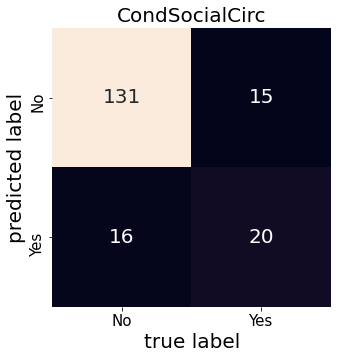

In [ ]:
mat = metrics.confusion_matrix(y_test, y_pred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=categ, yticklabels=categ)

plt.tick_params(labelsize=15)
plt.title(classe)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.show()

In [ ]:
# similar to confusion matrix, why use it?
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True, normalize=True)

Predicted,0,1,All
True,,,
0,0.730769,0.098901,0.82967
1,0.109890,0.060440,0.17033
All,0.840659,0.159341,1.00000


In [ ]:
#print(classification_report(y_test, y_pred))

In [ ]:
#!pip install graphviz
#!pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image
import pydotplus

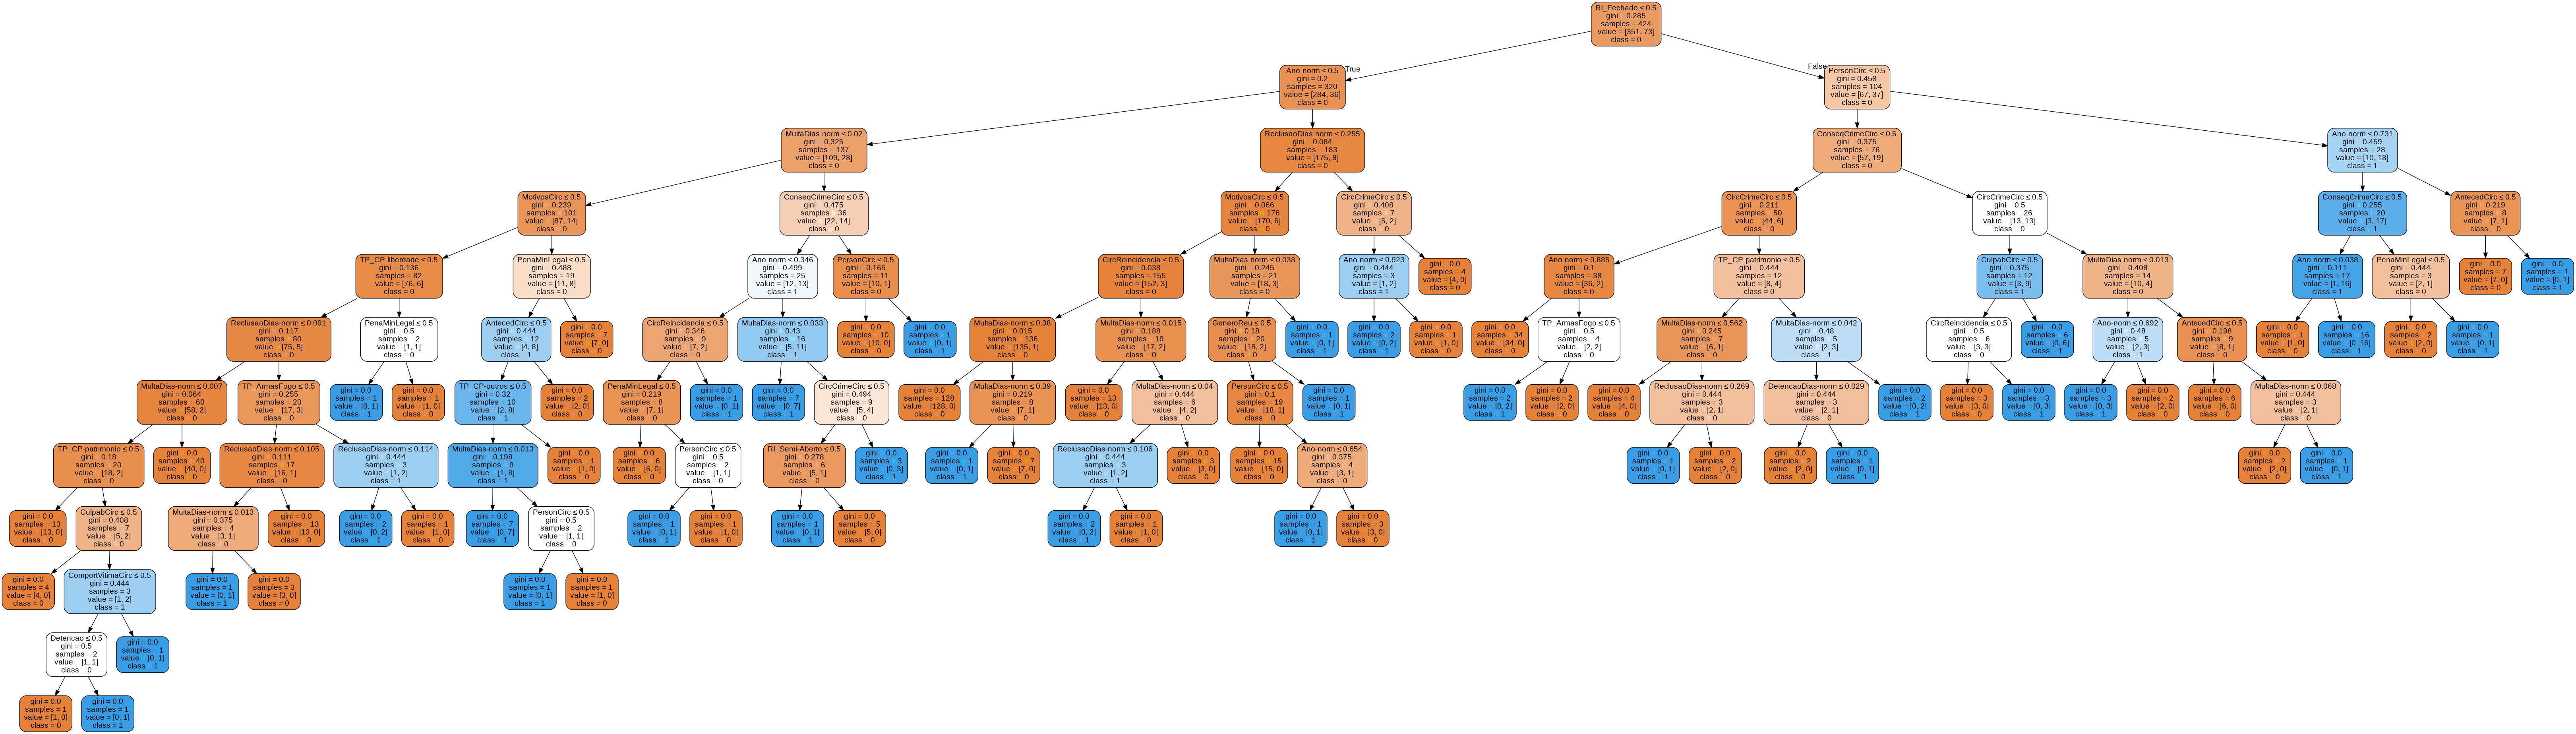

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True,
                special_characters=True,
                feature_names=data_src.columns.drop(classe),
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('ap-dt-treeView.png')
Image(graph.create_png())